In [56]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [34]:
# reading Sony Stock data using pandas data reader
df_sony=pdr.get_data_yahoo('Sony')

In [35]:
df_sony.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-05-16,87.160004,85.959999,86.290001,86.360001,546100,86.360001
2022-05-17,87.940002,86.809998,87.470001,87.690002,562300,87.690002
2022-05-18,89.230003,86.940002,88.800003,87.070000,1066600,87.070000
2022-05-19,89.730003,87.870003,88.099998,88.709999,778500,88.709999
2022-05-20,90.500000,88.220001,89.940002,89.940002,806100,89.940002


### Filling Missing date's values using resampling

In [36]:
df_sony=df_sony.reset_index()
df_sony['Date']=pd.to_datetime(df_sony['Date'])

# upsample
df_sony = df_sony.set_index('Date').resample('D').asfreq()

# covert Date to Monday .. Sunday
df_sony['Day'] = df_sony.index.strftime('%A')

# drop Day in ['Saturday', 'Sunday']
condition = df_sony['Day'].isin(['Saturday', 'Sunday'])
df_sony = df_sony[~condition].fillna(method='ffill').reset_index()

df_sony=df_sony.set_index("Date")

In [37]:
df_sony.head(10)

,High,Low,Open,Close,Volume,Adj Close,Day
Date,,,,,,,
2017-05-23,35.759998,35.509998,35.669998,35.549999,537700.0,35.549999,Tuesday
2017-05-24,36.049999,35.669998,35.720001,36.020000,1047100.0,36.020000,Wednesday
2017-05-25,36.209999,35.799999,35.980000,36.169998,1718400.0,36.169998,Thursday
2017-05-26,36.820000,36.250000,36.250000,36.680000,2708800.0,36.680000,Friday
2017-05-29,36.820000,36.250000,36.250000,36.680000,2708800.0,36.680000,Monday
2017-05-30,36.700001,36.389999,36.540001,36.480000,2067900.0,36.480000,Tuesday
2017-05-31,36.669998,36.450001,36.630001,36.619999,1047000.0,36.619999,Wednesday
2017-06-01,36.529999,36.320000,36.389999,36.509998,1132100.0,36.509998,Thursday
2017-06-02,37.750000,37.189999,37.330002,37.750000,1375200.0,37.750000,Friday


In [38]:
df_sony['Day'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday'],
      dtype=object)

<AxesSubplot:xlabel='Date'>

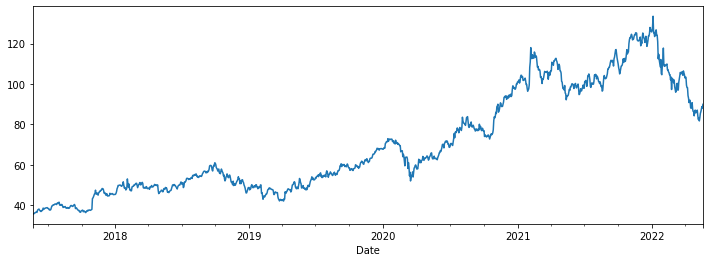

In [39]:
## Line plot of Open Price. It can be seen that there is a trend present in the open price. 
 
df_sony['Open'].plot(figsize=(12,4))

In [41]:
df_sony.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2017-05-23 to 2022-05-20
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1304 non-null   float64
 1   Low        1304 non-null   float64
 2   Open       1304 non-null   float64
 3   Close      1304 non-null   float64
 4   Volume     1304 non-null   float64
 5   Adj Close  1304 non-null   float64
 6   Day        1304 non-null   object 
dtypes: float64(6), object(1)
memory usage: 81.5+ KB


In [42]:
df_sony.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1304.000000,1304.000000,1304.000000,1304.000000,1.304000e+03,1304.000000
mean,70.747232,69.645828,70.243121,70.208205,1.050459e+06,70.208205
std,25.909409,25.451711,25.712606,25.680177,6.733608e+05,25.680177
min,35.759998,35.509998,35.669998,35.549999,1.882000e+05,35.549999
25%,49.580000,48.760000,49.047500,49.150002,6.357500e+05,49.150002
50%,60.615000,59.695000,60.145000,60.345001,8.839000e+05,60.345001
75%,97.335003,96.010000,96.710001,96.772497,1.240300e+06,96.772497
max,133.750000,128.309998,133.559998,128.589996,8.331100e+06,128.589996


### Checking yearly maximum stock price using resampling

In [44]:
# Yearly maximum stock price

df_sony.resample(rule='A').max()

,High,Low,Open,Close,Volume,Adj Close,Day
Date,,,,,,,
2017-12-31,48.330002,47.910000,48.290001,48.299999,6813800.0,48.299999,Wednesday
2018-12-31,61.020000,60.529999,61.000000,60.650002,6676300.0,60.650002,Wednesday
2019-12-31,68.470001,68.000000,68.199997,68.250000,8331100.0,68.250000,Wednesday
2020-12-31,101.400002,100.610001,100.930000,101.099998,3626500.0,101.099998,Wednesday
2021-12-31,128.300003,127.279999,128.000000,127.480003,3026200.0,127.480003,Wednesday
2022-12-31,133.750000,128.309998,133.559998,128.589996,3961500.0,128.589996,Wednesday


<AxesSubplot:xlabel='Date'>

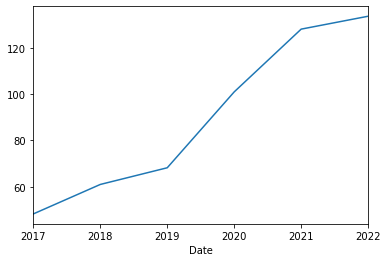

In [46]:
##year end frequency of maximum open price

df_sony.resample(rule='A').max()['Open'].plot()

<AxesSubplot:xlabel='Date'>

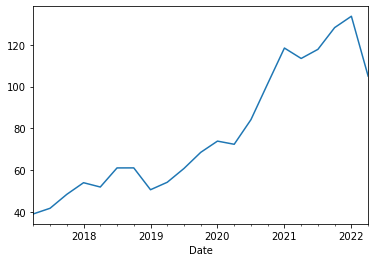

In [47]:
##quaterly high stock price  plot

df_sony.resample(rule='QS').max()['High'].plot()

In [49]:
##Business End Frequency

df_sony.resample(rule='BA').max()

,High,Low,Open,Close,Volume,Adj Close,Day
Date,,,,,,,
2017-12-29,48.330002,47.910000,48.290001,48.299999,6813800.0,48.299999,Wednesday
2018-12-31,61.020000,60.529999,61.000000,60.650002,6676300.0,60.650002,Wednesday
2019-12-31,68.470001,68.000000,68.199997,68.250000,8331100.0,68.250000,Wednesday
2020-12-31,101.400002,100.610001,100.930000,101.099998,3626500.0,101.099998,Wednesday
2021-12-31,128.300003,127.279999,128.000000,127.480003,3026200.0,127.480003,Wednesday
2022-12-30,133.750000,128.309998,133.559998,128.589996,3961500.0,128.589996,Wednesday


<AxesSubplot:xlabel='Date'>

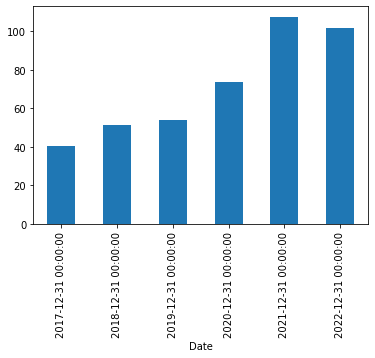

In [179]:
##plotting
df_sony['Open'].resample(rule='A').mean().plot(kind='bar')

<AxesSubplot:xlabel='Date'>

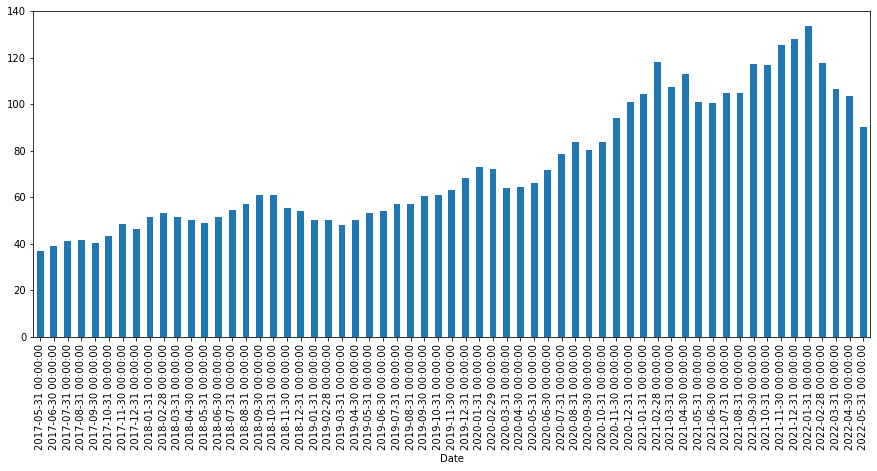

In [50]:
# Monthly maximum stock price plotting. From Monthly maximum Open Stock price plot it can be seen there is a chance of presence of seasonality in this stock price.

df_sony['Open'].resample(rule='M').max().plot(kind='bar',figsize=(15,6))


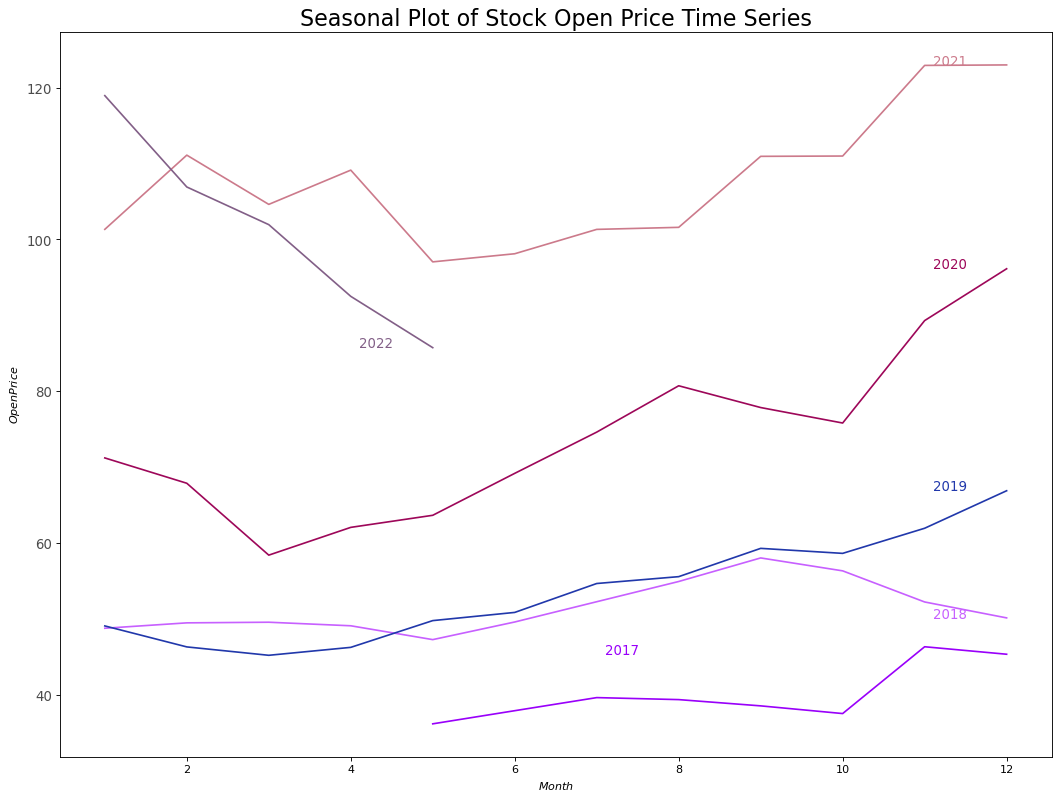

In [55]:
# Prepare data for plotting to check if  there is any seasonality in the data

monthly_avg=df_sony.resample(rule="M").mean()


monthly_avg['year'] = [d.year for d in monthly_avg.index]
monthly_avg['month'] = [d.month for d in monthly_avg.index]
years = monthly_avg['year'].unique()


# Prep Colors
import matplotlib as mpl
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)


# Draw Plot

plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i >= 0:        
        plt.plot('month', 'Open', data=monthly_avg.loc[monthly_avg.year==y, :], color=mycolors[i], label=y)
        plt.text(monthly_avg.loc[monthly_avg.year==y, :].shape[0]-.9, monthly_avg.loc[monthly_avg.year==y, 'Open'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# # Decoration
plt.gca().set( ylabel='$Open Price$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Stock Open Price Time Series", fontsize=20)
plt.show()


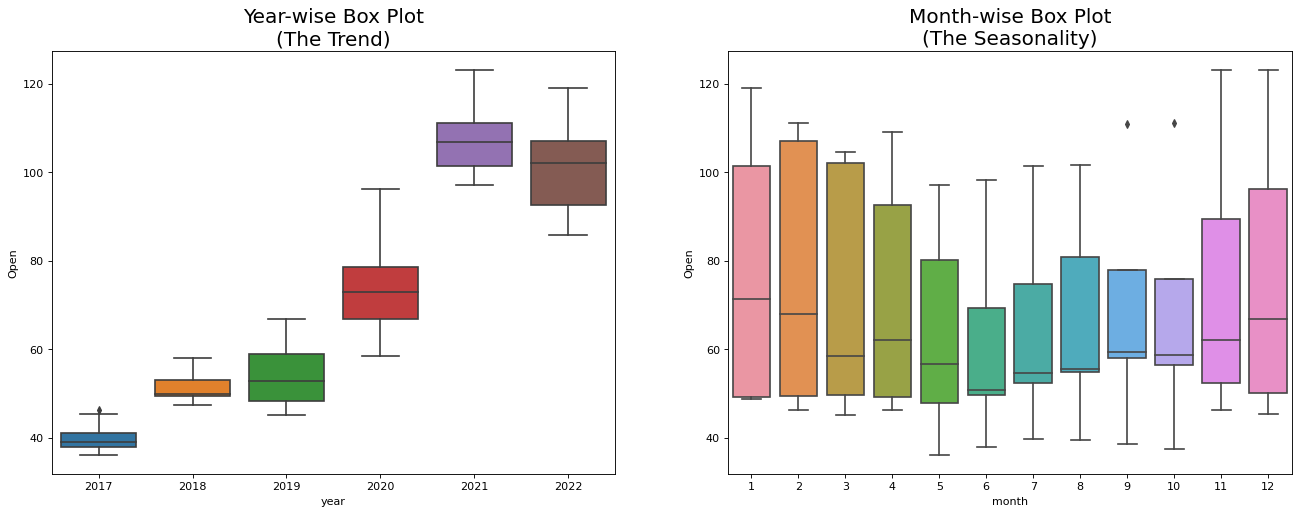

In [57]:
#year wise and month wise boxplot of Open Price

fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Open', data=monthly_avg, ax=axes[0])
sns.boxplot(x='month', y='Open', data=monthly_avg, ax=axes[1])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()


#### We can do a classical decomposition of a time series by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual.

In [59]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
df_sony['Open']
s=sm.tsa.seasonal_decompose(df_sony.Open,)

<Figure size 1008x360 with 0 Axes>

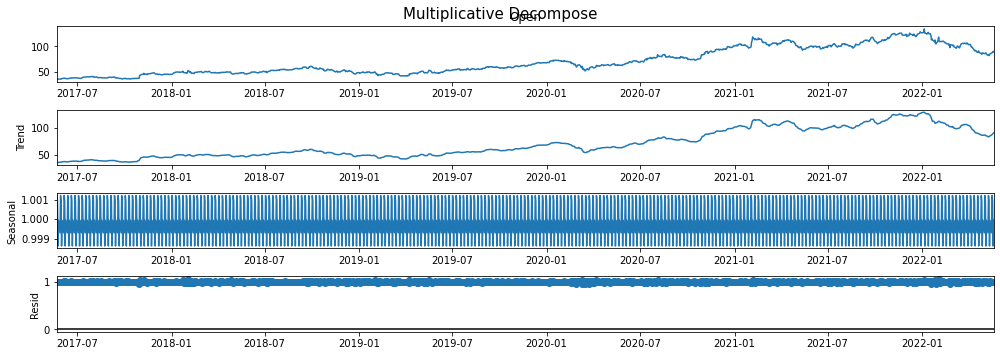

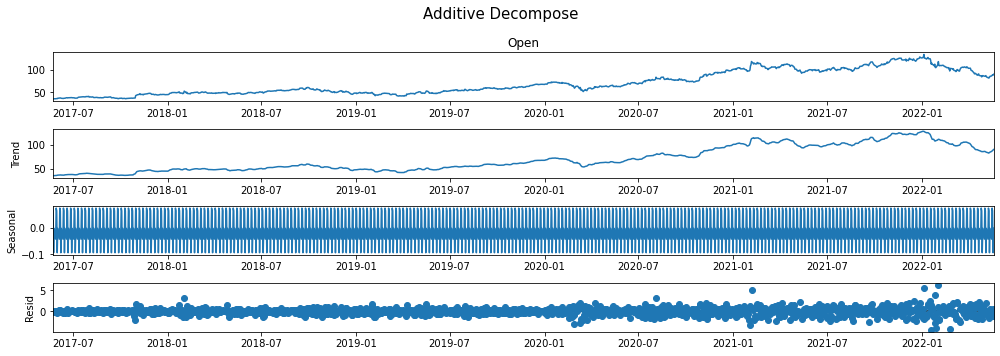

In [68]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df_sony['Open'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df_sony['Open'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (14,5)})
plt.tight_layout()
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=15)
result_add.plot().suptitle('Additive Decompose', fontsize=15)
figure.autofmt_xdate()
plt.tight_layout()
plt.show()

### From the above plots it can be seen that there is no such seasonality in this dataset.But there is a trand component present here. And the residual plot of multiplicative decompose is almost constant, so we can use additive decompose to extract different time series components from this data.

#### To reduce the magnitude of the values and the growing trend in the series, we first take a log of the series. We then calculate the rolling average of the series after obtaining the log of the series. A rolling average is computed by taking data from the previous 12 days and calculating a mean consumption value at each subsequent point in the series.

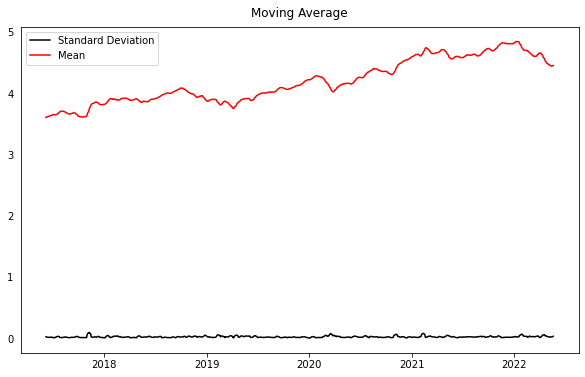

In [161]:
#if not stationary then eliminate trend
#Eliminate trend
df_open=df_sony['Open']

from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

df_log = np.log(df_open)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()

plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend(loc='best')
plt.show()

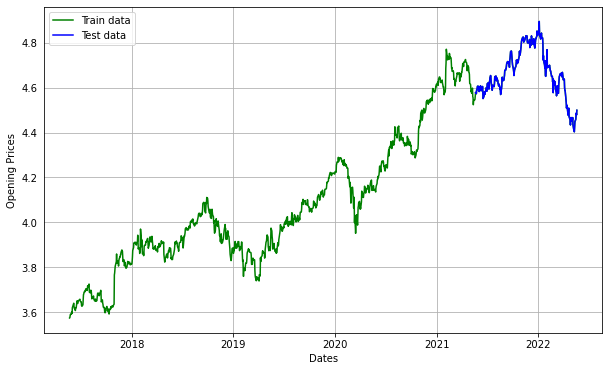

In [192]:
#split data into train and training set
train_data, test_data = df_log[:int(len(df_log)*0.8)], df_log[int(len(df_log)*0.8):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Opening Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [193]:
!pip install pmdarima

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5495.454, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5493.562, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5493.555, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5494.311, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5491.560, Time=0.27 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.158 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1043
Model:               SARIMAX(0, 1, 0)   Log Likelihood                2749.727
Date:                Sun, 22 May 2022   AIC                          -5495.454
Time:                        23:30:43   BIC                          -5485.556
Sample:                             0   HQIC                         -5491.699
                               - 1043                                  

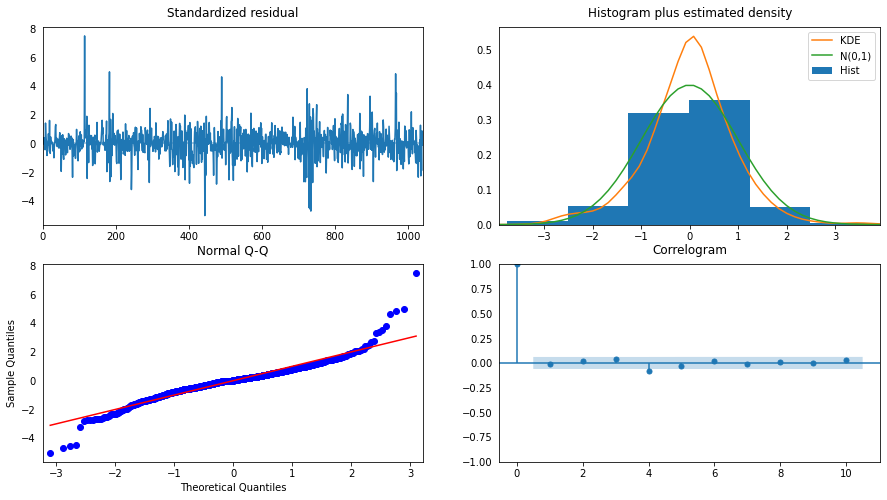

In [194]:
from pmdarima.arima import auto_arima

model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [195]:
#Modeling
# Build Model
model = ARIMA(train_data, order=(0,1,0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Open   No. Observations:                 1042
Model:                 ARIMA(0, 1, 0)   Log Likelihood                2749.727
Method:                           css   S.D. of innovations              0.017
Date:                Sun, 22 May 2022   AIC                          -5495.454
Time:                        23:30:44   BIC                          -5485.556
Sample:                    05-24-2017   HQIC                         -5491.699
                         - 05-20-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.774      0.076   -9.96e-05       0.002


/Users/Mimi/opt/anaconda3/envs/venv/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/Mimi/opt/anaconda3/envs/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information

In [198]:
# Forecast
fc, se, conf = fitted.forecast(261, alpha=0.05)  # 95% conf

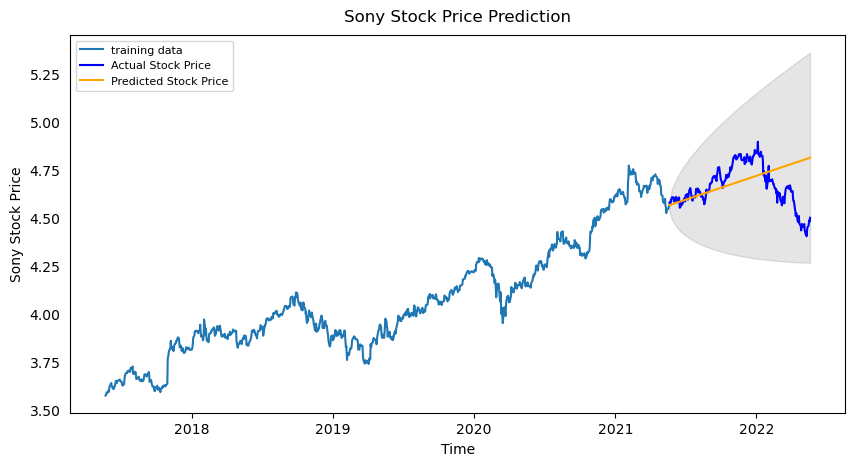

In [199]:
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Sony Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Sony Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [69]:
# Extract the Components ----
# Actual Values = Product of (Seasonal + Trend + Resid)

df_reconstructed = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
Date,,,,
2017-05-23,0.074123,35.6696,-0.073724,35.669998
2017-05-24,0.063873,35.8268,-0.170672,35.720001
2017-05-25,-0.093516,35.9740,0.099515,35.980000
2017-05-26,-0.002051,36.1480,0.104051,36.250000
2017-05-29,-0.042429,36.3300,-0.037571,36.250000


Text(0.5, 1.0, 'Stock Open Price detrended by subtracting the least squares fit')

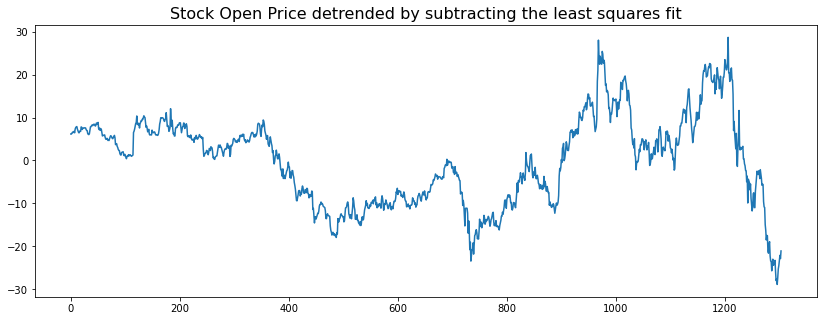

In [70]:
# Detranding the Open Series Using scipy: Subtracting the line of best fit
from scipy import signal

detrended = signal.detrend(df_sony.Open.values)
plt.plot(detrended)
plt.title('Stock Open Price detrended by subtracting the least squares fit', fontsize=16)

In [71]:
#df_sony['Open_30_days_rolling']=df_sony['Open'].rolling(30).mean()

In [72]:
## smoothening stock data using rolling average
#df_sony[['Open','Open_30_days_rolling']].plot(figsize=(12,5))

In [73]:
#df_sony.isnull().sum()

### Predicting Open Price using ARIMA model


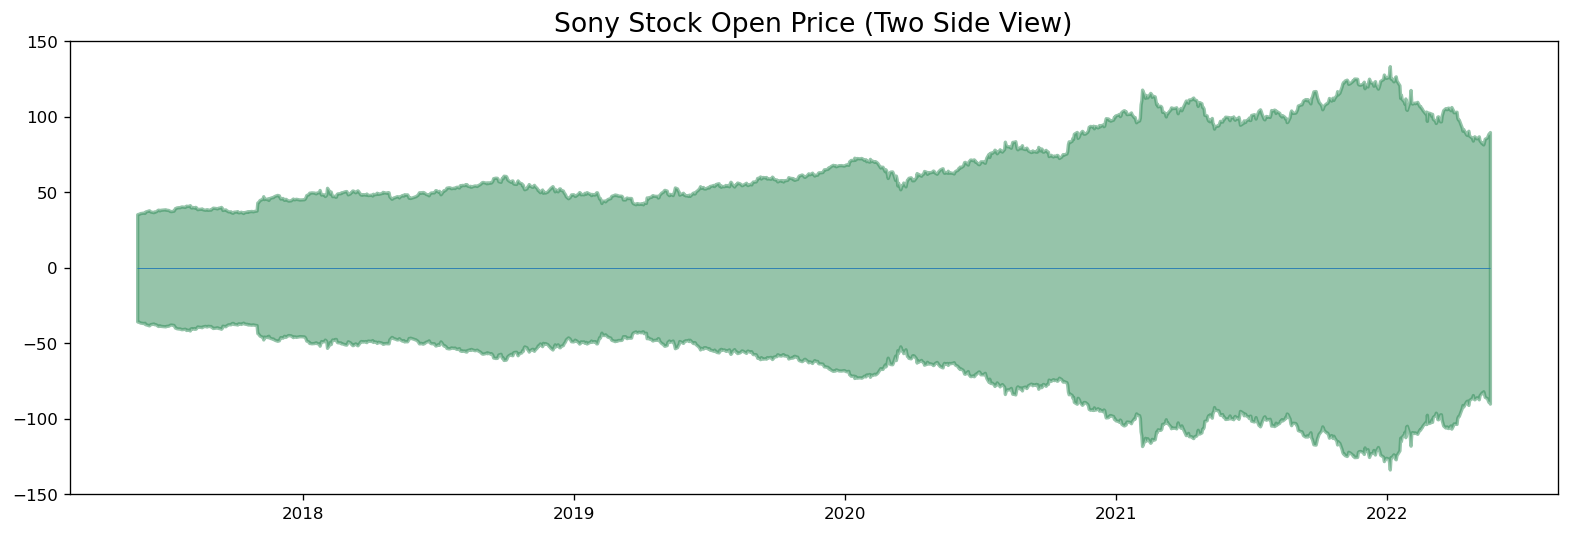

In [111]:
import numpy as np

x = df_sony.index
y1 = df_sony['Open'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-150, 150)
plt.title('Sony Stock Open Price (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df_sony.index), xmax=np.max(df_sony.index), linewidth=.5)
plt.show()

Text(0.5, 0.98, 'Lag Plots of Open Price')

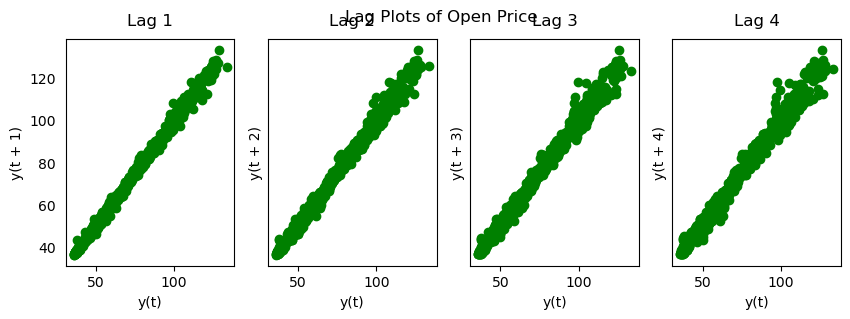

In [139]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})


# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df_sony.Open, lag=i+1, ax=ax, c='green')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Open Price')

<AxesSubplot:ylabel='Density'>

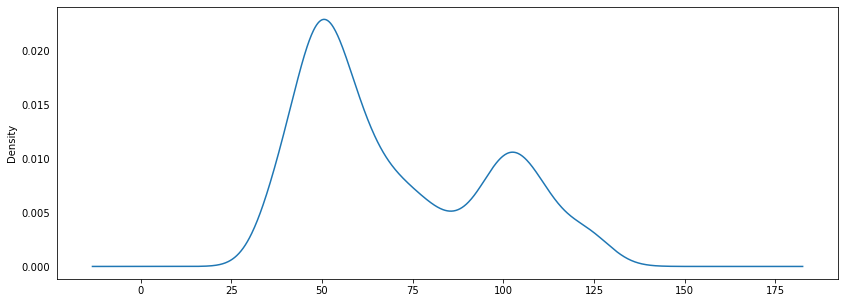

In [157]:
#Distribution of the dataset
df_open = df_sony['Open']
df_open.plot(kind='kde')

### Dickey Fuller Test
#### null hypothesis H0 : Data is not stationary
#### alternate hypothesis H1 : Data is stationary
#### confidence level for the test is 95%


In [74]:
#importing model for Dickey-fuller test
from statsmodels.tsa.stattools import adfuller


## writing a function to pass a series in Dickey fuller test
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [75]:
adf_test(df_sony['Open'])

ADF Statistics: -1.2658087374241271
p- value: 0.6446661391648589
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [76]:
## Use Techniques Differencing
df_sony['Open First Difference']=df_sony['Open']-df_sony['Open'].shift(1)

In [77]:
df_sony.head()

,High,Low,Open,Close,Volume,Adj Close,Day,Open First Difference
Date,,,,,,,,
2017-05-23,35.759998,35.509998,35.669998,35.549999,537700.0,35.549999,Tuesday,NaN
2017-05-24,36.049999,35.669998,35.720001,36.020000,1047100.0,36.020000,Wednesday,0.050003
2017-05-25,36.209999,35.799999,35.980000,36.169998,1718400.0,36.169998,Thursday,0.259998
2017-05-26,36.820000,36.250000,36.250000,36.680000,2708800.0,36.680000,Friday,0.270000
2017-05-29,36.820000,36.250000,36.250000,36.680000,2708800.0,36.680000,Monday,0.000000


In [78]:
adf_test(df_sony['Open First Difference'].dropna())

ADF Statistics: -36.448067996279185
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


### We can use d value as 1 because after single step differencing open data has become stationary.

Text(0.5, 0.98, 'Lag Plots of Open First Difference Price')

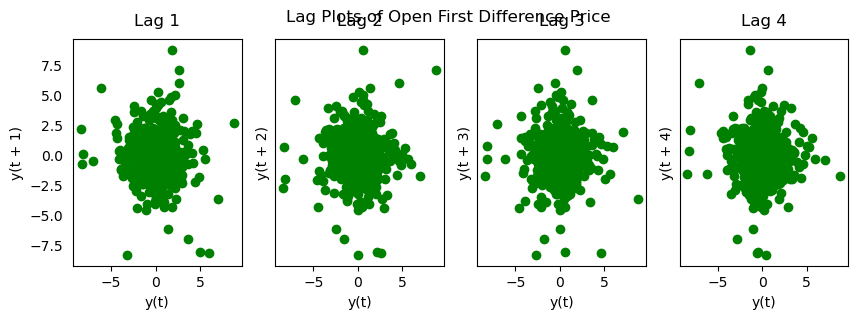

In [141]:
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})


# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df_sony['Open First Difference'], lag=i+1, ax=ax, c='green')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Open First Difference Price')

In [142]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

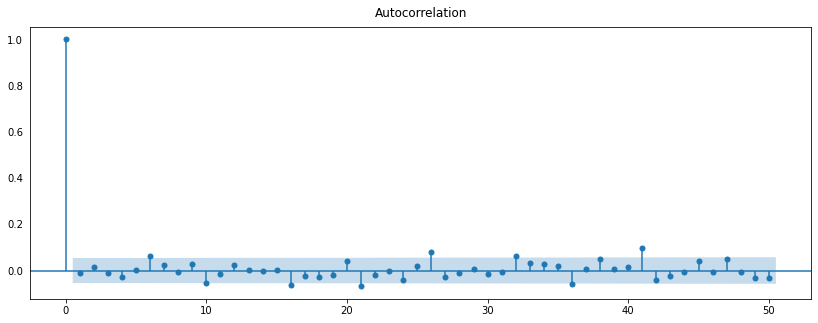

In [143]:
acf = plot_acf(df_sony["Open First Difference"].dropna(),lags=50)

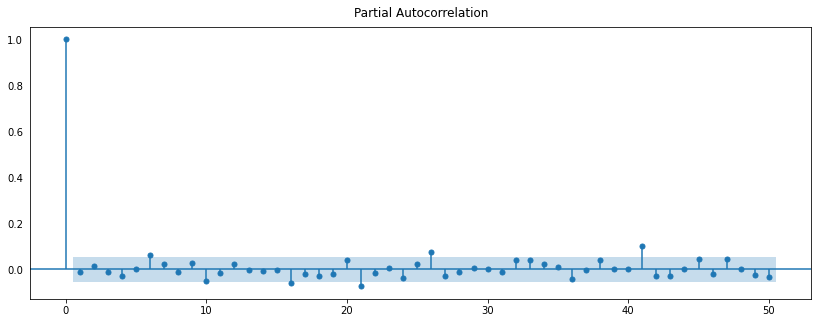

In [144]:
result = plot_pacf(df_sony["Open First Difference"].dropna(),lags=50)

In [145]:
# Splitting training and test data
from datetime import datetime,timedelta
train_dataset_end=datetime(2021,12,30)
test_dataset_end=datetime(2022,5,20)

In [146]:
train_data=df_sony.loc[:train_dataset_end].Open
test_data=df_sony.loc[train_dataset_end+timedelta(days=1):test_dataset_end].Open

In [147]:
##prediction start date and end date
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [148]:
test_data.head()

Date
2021-12-31    125.800003
2022-01-03    126.400002
2022-01-04    128.529999
2022-01-05    133.559998
2022-01-06    125.400002
Name: Open, dtype: float64

In [150]:
train_data.head()

Date
2017-05-23    35.669998
2017-05-24    35.720001
2017-05-25    35.980000
2017-05-26    36.250000
2017-05-29    36.250000
Name: Open, dtype: float64

In [156]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df_sony.Open, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/Users/Mimi/opt/anaconda3/envs/venv/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/Mimi/opt/anaconda3/envs/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information

                             ARIMA Model Results                              
Dep. Variable:                 D.Open   No. Observations:                 1303
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2230.689
Method:                       css-mle   S.D. of innovations              1.340
Date:                Sun, 22 May 2022   AIC                           4469.379
Time:                        21:05:14   BIC                           4490.068
Sample:                    05-24-2017   HQIC                          4477.141
                         - 05-20-2022                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0416      0.037      1.132      0.258      -0.030       0.114
ar.L1.D.Open    -0.5492      0.763     -0.720      0.472      -2.044       0.946
ma.L1.D.Open     0.5347      0.771      0.69

In [154]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)

In [155]:
pred

2021-12-31    0.040985
2022-01-03    0.065794
2022-01-04    0.072677
2022-01-05    0.074586
2022-01-06    0.075116
                ...   
2022-05-16    0.075320
2022-05-17    0.075320
2022-05-18    0.075320
2022-05-19    0.075320
2022-05-20    0.075320
Freq: B, Length: 101, dtype: float64